In [1]:
import numpy as np
import pandas as pd


In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'

In [4]:
!wget -O laptop_data.csv $data

--2025-09-12 14:51:37--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptop_data.csv’

laptop_data.csv     100%[===================>] 291.58K  --.-KB/s    in 0.002s  

2025-09-12 14:51:37 (120 MB/s) - ‘laptop_data.csv’ saved [298573/298573]



In [6]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [10]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [64]:
new_df = df[['ram','storage', 'screen', 'final_price']]
new_df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='final_price', ylabel='Count'>

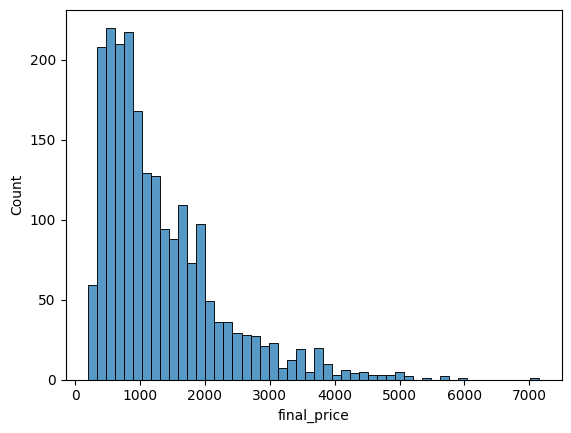

In [66]:
sns.histplot(new_df.final_price, bins=50)

The final price has the long tail which means the right skewed distribution and we have to use log1m to normalize the data.

In [67]:
new_df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

Question 1
There's one column with missing values. What is it?

'ram'
'storage'
'screen'
'final_price'

'Screen' column has 4 missing values

In [68]:
new_df.ram.median()

np.float64(16.0)

In [69]:
n = len(new_df)
n_test = int(len(new_df)*0.2)
n_val = int(len(new_df)*0.2)
n_train = n - n_val - n_test

In [70]:
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 2157, 2158, 2159], shape=(2160,))

In [71]:
np.random.seed(42)
np.random.shuffle(idx)

In [72]:
df_train = new_df.iloc[idx[:n_train]]
df_val = new_df.iloc[idx[n_train:n_train+n_val]]
df_test = new_df.iloc[idx[n_train+n_val:]]

In [73]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [74]:
df_train = df_train.reset_index(drop =True)
df_val = df_val.reset_index(drop =True)
df_test = df_test.reset_index(drop =True)

In [75]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [76]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [31]:
X_train = df_train.fillna(0).values
X_train

array([[   8. ,  256. ,   15.6],
       [  16. ,  500. ,   15.6],
       [  16. , 1000. ,   16. ],
       ...,
       [   4. ,  128. ,   15.6],
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   15.4]], shape=(1296, 3))

In [36]:
X_val = df_val.fillna(0).values

In [32]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [33]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [37]:
w0 , w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_val.dot(w)
score  = rmse(y_val, y_pred)
score

np.float64(0.42202461430364413)

In [41]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [42]:
mean = df_train.ram.mean()

X_train = prepare_X(df_train, fillna_value=mean)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=mean)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.4221223325877179)

In [43]:
X_train = prepare_X(df_train, fillna_value=0)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=0)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.42202461430364413)

In [53]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [54]:
for r in [0, 0.01, 1, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    print('%06s %0.2f' % (r, rmse_val))

     0 0.42
  0.01 0.42
     1 0.42
    10 0.48
   100 0.62


In [80]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = new_df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [81]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [90]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [83]:
mean = df_train.ram.mean()

X_train = prepare_X(df_train, fillna_value=mean)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=mean)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(600.3637630345228)

In [85]:
for r in [0, 0.01, 1, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    
    rmse_val = rmse(y_val, y_pred)
    print('%06s %0.2f' % (r, rmse_val))

     0 600.36
  0.01 600.36
     1 599.76
    10 598.11
   100 597.59


In [92]:
rmse_val = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    n = len(df)
    
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    
    df_shuffled = new_df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values
    
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    X_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w_0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)
    print(s, score)
    rmse_val.append(score)

0 565.4520868771027
1 636.7985423056726
2 588.9558697907962
3 597.8148920012521
4 571.962791511102
5 573.2383256618949
6 647.3438328407208
7 550.4398184485952
8 587.333503616991
9 576.1017929433108


In [94]:
rmse_std = round(np.std(rmse_val),3)
rmse_std

np.float64(29.176)

In [98]:
n = len(df)
    
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_shuffled = new_df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_full_train = pd.concat([df_train,df_val])

y_full_train = df_full_train.final_price.values
y_test = df_test.final_price.values

del df_full_train['final_price']
del df_test['final_price']

X_train = prepare_X(df_full_train, fillna_value=0)
w_0, w = train_linear_regression_reg(X_train, y_full_train, r = 0.001)
X_test = prepare_X(df_test, fillna_value=0)
y_pred = w_0 + X_test.dot(w)

score = rmse(y_test, y_pred)
score

np.float64(608.609982204956)